# Example for computing a price serie's spectrogram

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [14]:
from datetime import datetime
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
pd.set_option('display.max_rows', 5)
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

from utils import *

# Data 

In [15]:
api_key = open(file='quandl_api').read().replace('\n', '')
quandl.ApiConfig.api_key = api_key

In [16]:
prices_dict = get_quandl_edi(list(QUANDL_FREE_SAMPLES_EDI.keys()))
print(len(prices_dict))
print(list(prices_dict.keys()))

191
['XNAS/AAXJ', 'XNAS/AAON', 'XNAS/ABAX', 'XNAS/ABM', 'XNAS/ACET', 'XNAS/ACNB', 'XNAS/AAPL', 'XNAS/AAME', 'XNAS/ACLS', 'XNAS/AAL', 'XNAS/ABCO', 'XNAS/ABG', 'XNAS/ABAC', 'XNAS/ACIW', 'XBOM/500003', 'XBOM/500008', 'XBOM/500012', 'XBOM/500013', 'XBOM/500002', 'XBOM/500023', 'XBOM/500024', 'XBOM/500027', 'XBOM/500031', 'XBOM/500032', 'XBOM/500038', 'XBOM/500039', 'XBOM/500020', 'XBOM/500040', 'XBOM/500010', 'XTSE/AND', 'XTSE/AFN', 'XTSE/AGT', 'XTSE/ACQ', 'XTSE/ALA', 'XTSE/AIF', 'XTSE/ALB', 'XTSE/ALO', 'XTSE/ABT', 'XTSE/ACD', 'XTSE/AEM', 'XTSE/AGU', 'XTSE/ALC', 'XTSE/ABX', 'XTSE/AAB', 'XSHG/600020', 'XSHG/600015', 'XSHG/600021', 'XSHG/600019', 'XSHG/600009', 'XSHG/600016', 'XSHG/600007', 'XSHG/600000', 'XSHG/600006', 'XSHG/600017', 'XSHG/600011', 'XSHG/600010', 'XSHG/600026', 'XSHG/600012', 'XSHG/600004', 'XLON/ADM', 'XLON/ABC', 'XLON/AFS', 'XLON/AAIF', 'XLON/ADT', 'XLON/AEFS', 'XLON/AAS', 'XLON/AFN', 'XLON/AGK', 'XLON/AAL', 'XLON/AEP', 'XLON/ABF', 'XLON/ADIG', 'XLON/ABBY', 'XLON/AEO', 'X

j: 51  -  XSHG/600000


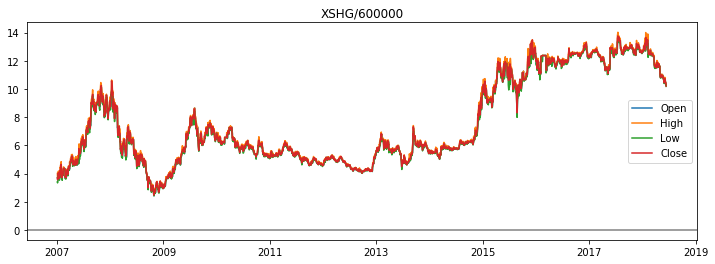

In [205]:
j = np.random.choice(len(prices_dict) - 1)
ticker_j = list(prices_dict.keys())[j]
print('j:', j, ' - ', ticker_j)
# prices_dict[ticker_j][['Open', 'High', 'Low', 'Close']].plot()
plot_prices(prices_dict[ticker_j], name=ticker_j)

In [206]:
price = prices_dict[ticker_j]
price

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-04,3.699909,4.005814,3.411094,3.667439,9.460265e+04
2007-01-05,3.667439,3.667439,3.335899,3.559774,6.637745e+04
...,...,...,...,...,...
2018-06-12,10.410000,10.410000,10.300000,10.350000,1.608567e+07
2018-06-13,10.300000,10.330000,10.180000,10.210000,1.996158e+07


In [207]:
price.groupby(price.index.year).count()

,Open,High,Low,Close,Volume
Date,,,,,
2007,258,258,258,258,258
2008,262,262,262,262,262
...,...,...,...,...,...
2017,260,260,260,260,260
2018,118,118,118,118,118


In [208]:
days_per_year = 260

# Fabricated Signal

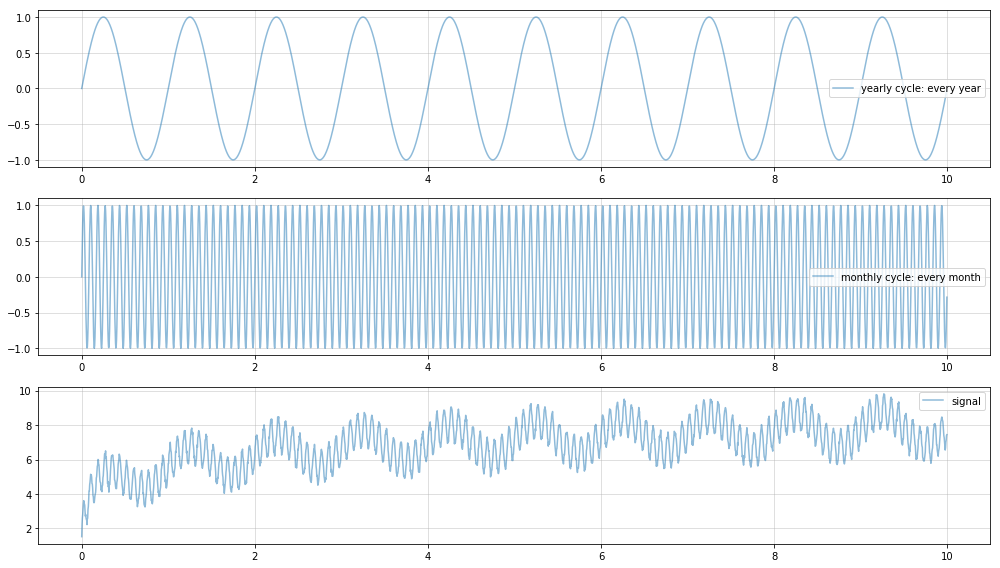

In [140]:
sigma = 0.1

x = np.arange(10 * days_per_year)
years = x / days_per_year
yearly_cycle = np.sin(2 * np.pi * x / (1 * days_per_year))
monthly_cycle = np.sin(2 * np.pi * x * 12 / days_per_year)
noise = sigma * np.random.randn(len(x))
y = yearly_cycle + monthly_cycle + np.log(x + 5) + noise

plt.subplots(3, 1, figsize=(14, 8))
plt.subplot(3, 1, 1)
plt.plot(years, yearly_cycle, label='yearly cycle: every year', alpha=0.5)
plt.grid(alpha=0.5); plt.legend()
plt.subplot(3, 1, 2)
plt.plot(years, monthly_cycle, label='monthly cycle: every month', alpha=0.5)
plt.grid(alpha=0.5); plt.legend()
plt.subplot(3, 1, 3)
plt.plot(years, y, label='signal', alpha=0.5)
plt.grid(alpha=0.5); plt.legend()
plt.tight_layout()

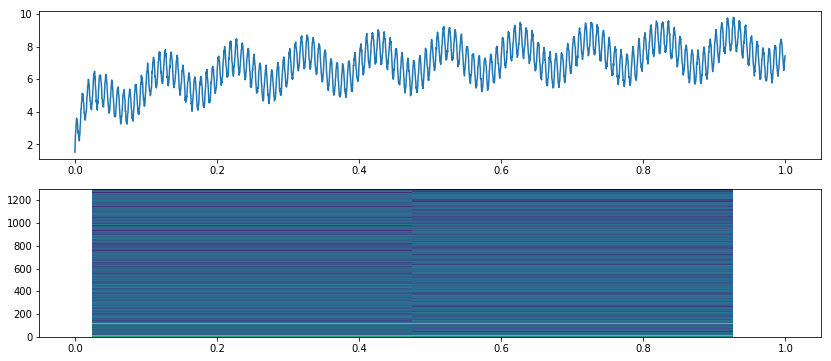

In [150]:
Fs = 10 * days_per_year          # the sampling frequency
NFFT = 5 * days_per_year         # the length of the windowing segments

plt.subplots(figsize=(14, 6))
ax1 = plt.subplot(211)
plt.plot(years / 10, y)
plt.subplot(212, sharex=ax1)
Pxx, freqs, bins, im = plt.specgram(y, NFFT=NFFT, Fs=Fs)
plt.show()

In [151]:
print('Monthly cycle freq.:', 12)
print('Yearly cycle freq.:', 1)

Monthly cycle freq.: 12
Yearly cycle freq.: 1


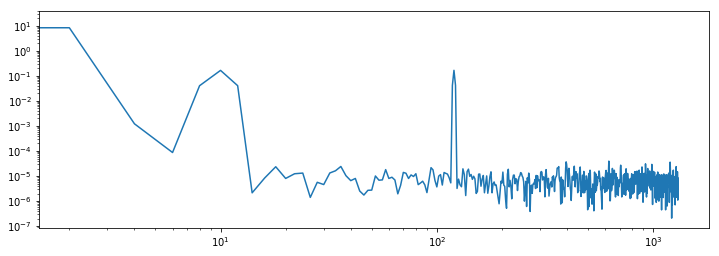

In [152]:
mean_power = Series(Pxx.mean(axis=1), freqs)
# np.log(mean_power).plot()
plt.loglog(mean_power)

In [153]:
list(zip(mean_power.sort_values(ascending=False).head(10).index,
         Fs / mean_power.sort_values(ascending=False).head(10).index,
         mean_power.sort_values(ascending=False).head(10)))

[(0.0, inf, 16.219344355500944),
 (2.0, 1305.0, 8.285481336672001),
 (120.0, 21.75, 0.16592893194845892),
 (10.0, 261.0, 0.16508906074443513),
 (122.0, 21.39344262295082, 0.04172632644546094),
 (118.0, 22.11864406779661, 0.04147402053791312),
 (12.0, 217.5, 0.040515493131373106),
 (8.0, 326.25, 0.04033999336860722),
 (4.0, 652.5, 0.0012198258876346868),
 (6.0, 435.0, 8.731280428054202e-05)]

# Scipy Spectrogram

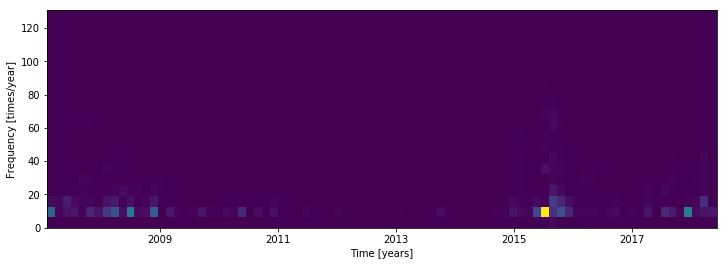

In [154]:
f, t, Sxx = signal.spectrogram(x=price.Close.values, fs=261, nperseg=40, 
                               window=('tukey', 0.25), detrend='constant')

t_date = price.index[np.floor((len(price) - 1) * t / np.max(t)).astype('int')]
plt.pcolormesh(t_date, f, Sxx)
plt.ylabel('Frequency [times/year]')
plt.xlabel('Time [years]')
plt.show()

In [155]:
print('t.shape:', t.shape)
print('f.shape:', f.shape)
print('Sxx.shape:', Sxx.shape)

t.shape: (85,)
f.shape: (21,)
Sxx.shape: (21, 85)


In [156]:
len(price) / 261

11.436781609195402

In [157]:
len(price)

2985

# Pyplot Spectrogram 

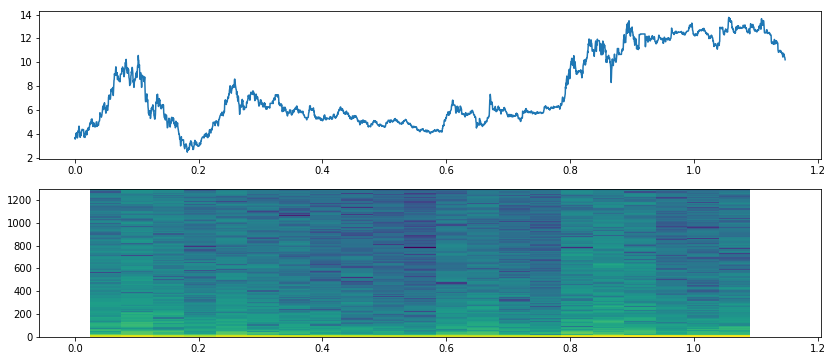

In [209]:
Fs = 10 * days_per_year          # the sampling frequency
NFFT = days_per_year         # the length of the windowing segments

# Pxx is the segments x freqs array of instantaneous power, freqs is
# the frequency vector, bins are the centers of the time bins in which
# the power is computed, and im is the matplotlib.image.AxesImage
# instance

plt.subplots(figsize=(14, 6))
ax1 = plt.subplot(211)
plt.plot(np.arange(len(price)) / Fs, price['Close'].values)
plt.subplot(212, sharex=ax1)
Pxx, freqs, bins, im = plt.specgram(price['Close'], NFFT=NFFT, Fs=Fs)
plt.show()

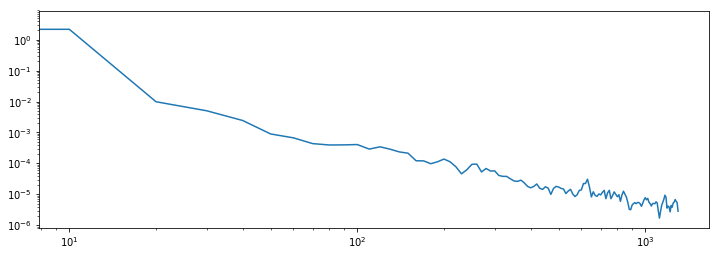

In [210]:
mean_power = Series(Pxx.mean(axis=1), freqs)
plt.loglog(mean_power)

In [211]:
n = 20
list(zip(mean_power.sort_values(ascending=False).head(n).index,
         Fs / mean_power.sort_values(ascending=False).head(n).index,
         mean_power.sort_values(ascending=False).head(n)))

[(0.0, inf, 4.181206986950268),
 (10.0, 260.0, 2.160877898138788),
 (20.0, 130.0, 0.00984956532011333),
 (30.0, 86.66666666666667, 0.0050257620307529),
 (40.0, 65.0, 0.002438739258406383),
 (50.0, 52.0, 0.0008954801173594316),
 (60.0, 43.333333333333336, 0.0006711198183033745),
 (70.0, 37.142857142857146, 0.0004366034061555525),
 (100.0, 26.0, 0.0004071449831062258),
 (90.0, 28.88888888888889, 0.000397761335065674),
 (80.0, 32.5, 0.0003941902675570901),
 (120.0, 21.666666666666668, 0.0003437746897557714),
 (110.0, 23.636363636363637, 0.00029061155471993435),
 (130.0, 20.0, 0.00028802967479099026),
 (140.0, 18.571428571428573, 0.00023519507967087423),
 (150.0, 17.333333333333332, 0.00021409874413044723),
 (200.0, 13.0, 0.00013828697954262824),
 (160.0, 16.25, 0.00012189934406056599),
 (170.0, 15.294117647058824, 0.00012071883266294191),
 (190.0, 13.68421052631579, 0.00011319283589839489)]

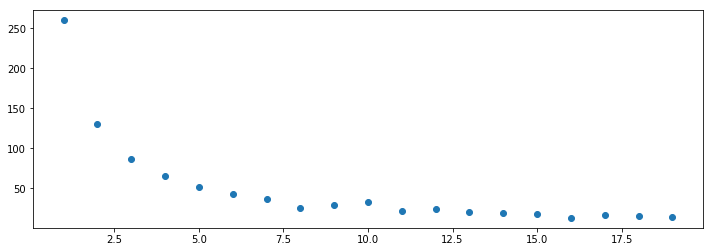

In [212]:
plt.plot(Fs / mean_power.sort_values(ascending=False).head(n).index, 'o')

# RS System

In [176]:
from trading_strategies import *
test_RS_Trading_Strategy()

In [213]:
rs = RS_Trading_Strategy(price, equity=1e6,
                         days_fast=24, days_slow=260, name=ticker_j)
rs.excecute()

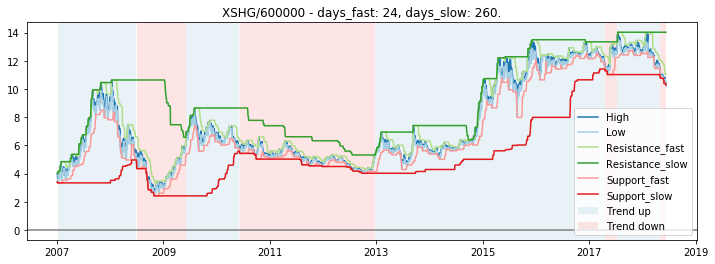

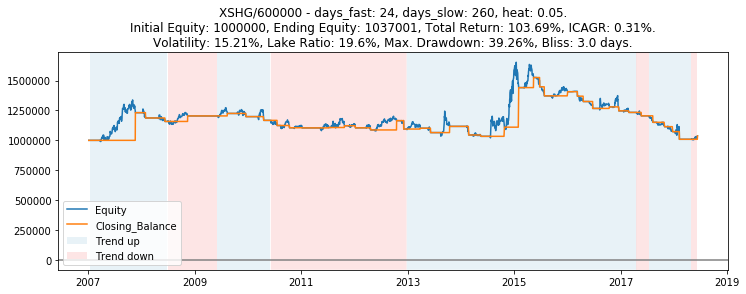

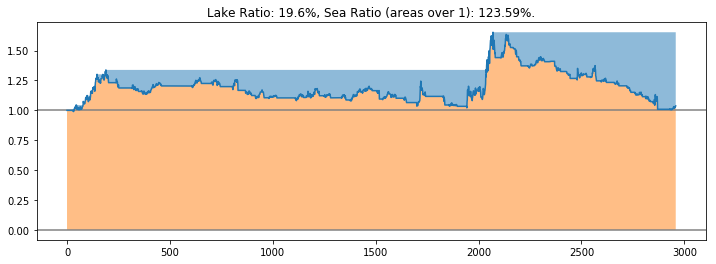

In [214]:
rs.plot_state()
rs.plot_equity()
rs.plot_lake_ratio()